In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

In [ ]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

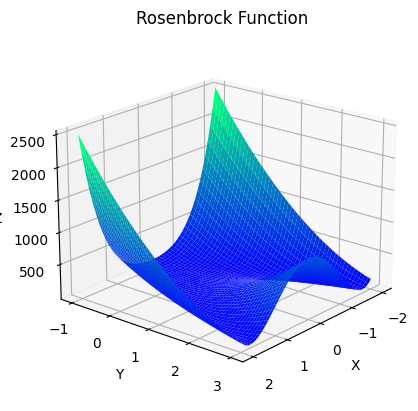

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='winter')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rosenbrock Function')

ax.view_init(elev=20, azim=40)

plt.show()

In [ ]:
num_particles = 50
num_dimensions = 2
iterations = 200

In [ ]:
def pso(rosenbrock, num_particles=30, num_dimensions=2, iterations=100, w=0.5, c1=1.5, c2=2.0):
    positions = np.random.uniform(low=-2, high=2, size=(num_particles, num_dimensions))
    velocities = np.random.uniform(low=-1, high=1, size=(num_particles, num_dimensions))

    personal_best_positions = np.copy(positions)
    personal_best_scores = np.array([rosenbrock(pos[0], pos[1]) for pos in positions])

    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
    global_best_score = np.min(personal_best_scores)

    progress = []

    for i in range(iterations):
        for j in range(num_particles):
            velocities[j] = (w * velocities[j] +
                             c1 * np.random.rand() * (personal_best_positions[j] - positions[j]) +
                             c2 * np.random.rand() * (global_best_position - positions[j]))

            positions[j] = positions[j] + velocities[j]

            score = rosenbrock(positions[j][0], positions[j][1])
            if score < personal_best_scores[j]:
                personal_best_scores[j] = score
                personal_best_positions[j] = np.copy(positions[j])

        current_global_best_score = np.min(personal_best_scores)
        if current_global_best_score < global_best_score:
            global_best_score = current_global_best_score
            global_best_position = personal_best_positions[np.argmin(personal_best_scores)]

        progress.append(global_best_score)
        print(f"Iteration {i+1}/{iterations}, Global Best Score: {global_best_score}")

    return global_best_position, global_best_score, progress

In [ ]:
best_position, best_score, progress = pso(rosenbrock, num_particles=50, iterations=200)
print(f"Best position: {best_position}")
print(f"Best score: {best_score}")

Iteration 1/200, Global Best Score: 0.029443952185160778
Iteration 2/200, Global Best Score: 0.029443952185160778
Iteration 3/200, Global Best Score: 0.029443952185160778
Iteration 4/200, Global Best Score: 0.029443952185160778
Iteration 5/200, Global Best Score: 0.01080987897567269
Iteration 6/200, Global Best Score: 0.009973610145990599
Iteration 7/200, Global Best Score: 0.00019217646700848222
Iteration 8/200, Global Best Score: 0.00019217646700848222
Iteration 9/200, Global Best Score: 0.00019217646700848222
Iteration 10/200, Global Best Score: 0.00019217646700848222
Iteration 11/200, Global Best Score: 0.00014631947725243094
Iteration 12/200, Global Best Score: 0.00014631947725243094
Iteration 13/200, Global Best Score: 0.00014631947725243094
Iteration 14/200, Global Best Score: 0.00014631947725243094
Iteration 15/200, Global Best Score: 8.911178678745694e-05
Iteration 16/200, Global Best Score: 8.911178678745694e-05
Iteration 17/200, Global Best Score: 8.911178678745694e-05
Itera

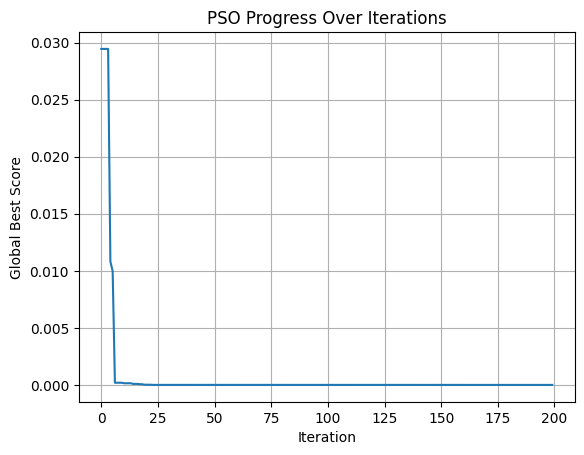

In [ ]:
plt.figure()
plt.plot(progress)
plt.xlabel('Iteration')
plt.ylabel('Global Best Score')
plt.title('PSO Progress Over Iterations')
plt.grid(True)
plt.show()

In [ ]:
def ga(rosenbrock, num_individuals=50, num_dimensions=2, iterations=250, mutation_rate=0.05, crossover_rate=0.8):
    population = np.random.uniform(low=-2, high=2, size=(num_individuals, num_dimensions))
    fitness = np.array([rosenbrock(ind[0], ind[1]) for ind in population])

    progress = []

    for i in range(iterations):
        selected_indices = np.random.choice(num_individuals, size=num_individuals, replace=True, p=(1/fitness)/np.sum(1/fitness))
        selected_population = population[selected_indices]

        for j in range(0, num_individuals, 2):
            if np.random.rand() < crossover_rate:
                crossover_point = np.random.randint(1, num_dimensions)
                selected_population[j, crossover_point:], selected_population[j+1, crossover_point:] = \
                selected_population[j+1, crossover_point:], selected_population[j, crossover_point:]

        for j in range(num_individuals):
            if np.random.rand() < mutation_rate:
                mutation_index = np.random.randint(num_dimensions)
                selected_population[j, mutation_index] += np.random.uniform(-0.5, 0.5)

        population = selected_population
        fitness = np.array([rosenbrock(ind[0], ind[1]) for ind in population])

        best_fitness = np.min(fitness)
        progress.append(best_fitness)
        print(f"GA Iteration {i+1}/{iterations}, Best Fitness: {best_fitness}")

    best_individual = population[np.argmin(fitness)]
    return best_individual, best_fitness, progress

In [ ]:
ga_position, ga_score, ga_progress = ga(rosenbrock, num_individuals=100, iterations=300)
print(f"Best position: {ga_position}")
print(f"Best score: {ga_score}")

GA Iteration 1/300, Best Fitness: 0.09002860414337019
GA Iteration 2/300, Best Fitness: 0.09002860414337019
GA Iteration 3/300, Best Fitness: 0.09002860414337019
GA Iteration 4/300, Best Fitness: 0.09002860414337019
GA Iteration 5/300, Best Fitness: 0.09002860414337019
GA Iteration 6/300, Best Fitness: 0.09002860414337019
GA Iteration 7/300, Best Fitness: 0.09002860414337019
GA Iteration 8/300, Best Fitness: 0.09002860414337019
GA Iteration 9/300, Best Fitness: 0.09002860414337019
GA Iteration 10/300, Best Fitness: 0.09002860414337019
GA Iteration 11/300, Best Fitness: 0.09002860414337019
GA Iteration 12/300, Best Fitness: 0.09002860414337019
GA Iteration 13/300, Best Fitness: 0.09002860414337019
GA Iteration 14/300, Best Fitness: 0.09002860414337019
GA Iteration 15/300, Best Fitness: 0.07306441473211689
GA Iteration 16/300, Best Fitness: 0.07306441473211689
GA Iteration 17/300, Best Fitness: 0.07306441473211689
GA Iteration 18/300, Best Fitness: 0.07306441473211689
GA Iteration 19/300

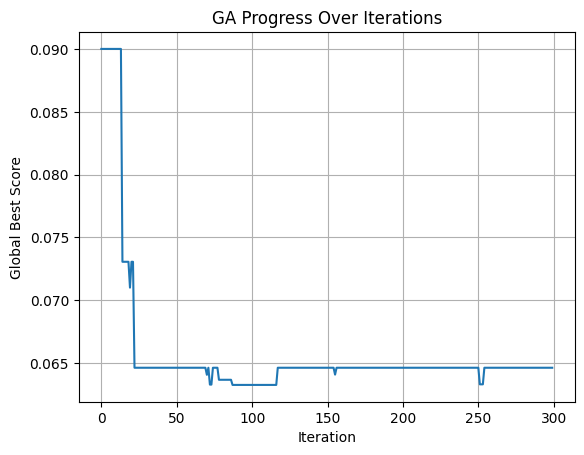

In [ ]:
plt.figure()
plt.plot(ga_progress)
plt.xlabel('Iteration')
plt.ylabel('Global Best Score')
plt.title('GA Progress Over Iterations')
plt.grid(True)
plt.show()

In [ ]:
def aco(rosenbrock, num_ants=50, num_dimensions=2, iterations=100, alpha=1, beta=1, evaporation_rate=0.5, pheromone_initial=0.1):
    pheromone = np.full((num_dimensions, 100), pheromone_initial)

    best_score = float('inf')
    best_position = None
    progress = []

    for i in range(iterations):
        positions = []
        for ant in range(num_ants):
            position = []
            for d in range(num_dimensions):
                x_values = np.linspace(-2, 2, 100)
                p_values = (pheromone[d] ** alpha) / np.sum(pheromone[d] ** alpha)
                chosen_value = np.random.choice(x_values, p=p_values)
                position.append(chosen_value)
            positions.append(position)

        positions = np.array(positions)
        scores = np.array([rosenbrock(pos[0], pos[1]) for pos in positions])

        min_score = np.min(scores)
        if min_score < best_score:
            best_score = min_score
            best_position = positions[np.argmin(scores)]

        for d in range(num_dimensions):
            for idx, pos in enumerate(positions):
                x_idx = np.argmin(np.abs(np.linspace(-2, 2, 100) - pos[d]))
                pheromone[d, x_idx] = (1 - evaporation_rate) * pheromone[d, x_idx] + 1 / scores[idx]

        progress.append(best_score)
        print(f"ACO Iteration {i+1}/{iterations}, Best Score: {best_score}")

    return best_position, best_score, progress

In [ ]:
aco_position, aco_score, aco_progress = aco(rosenbrock, num_ants=50, iterations=300)
print(f"Best position: {aco_position}")
print(f"Best score: {aco_score}")

ACO Iteration 1/300, Best Score: 0.1031522190061994
ACO Iteration 2/300, Best Score: 0.1031522190061994
ACO Iteration 3/300, Best Score: 0.1031522190061994
ACO Iteration 4/300, Best Score: 0.1031522190061994
ACO Iteration 5/300, Best Score: 0.1031522190061994
ACO Iteration 6/300, Best Score: 0.012849532864497231
ACO Iteration 7/300, Best Score: 0.012849532864497231
ACO Iteration 8/300, Best Score: 0.012849532864497231
ACO Iteration 9/300, Best Score: 0.012849532864497231
ACO Iteration 10/300, Best Score: 0.012849532864497231
ACO Iteration 11/300, Best Score: 0.012849532864497231
ACO Iteration 12/300, Best Score: 0.012849532864497231
ACO Iteration 13/300, Best Score: 0.012849532864497231
ACO Iteration 14/300, Best Score: 0.012849532864497231
ACO Iteration 15/300, Best Score: 0.012849532864497231
ACO Iteration 16/300, Best Score: 0.012849532864497231
ACO Iteration 17/300, Best Score: 0.012849532864497231
ACO Iteration 18/300, Best Score: 0.012849532864497231
ACO Iteration 19/300, Best Sc

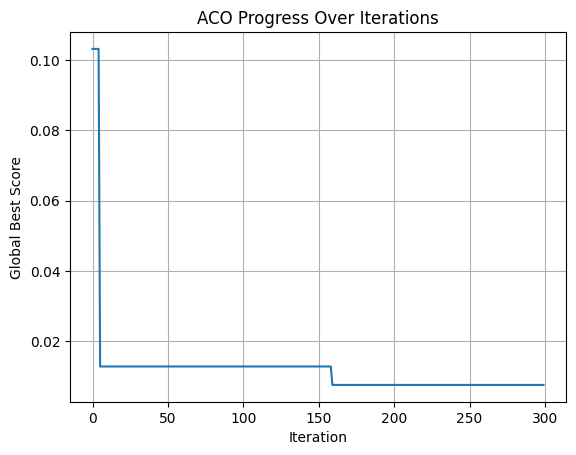

In [ ]:
plt.figure()
plt.plot(aco_progress)
plt.xlabel('Iteration')
plt.ylabel('Global Best Score')
plt.title('ACO Progress Over Iterations')
plt.grid(True)
plt.show()

In [ ]:
def mmas_aco(rosenbrock, num_ants=50, num_dimensions=2, iterations=100, alpha=1, beta=1, rho=0.1):
    tau_max = 1 / (rho * (rosenbrock(1, 1) + 1e-10))
    tau_min = tau_max / 100
    pheromone = np.full((num_dimensions, 100), tau_max)

    best_score = float('inf')
    best_position = None
    progress = []

    for iteration in range(iterations):
        positions = []
        for ant in range(num_ants):
            position = []
            for d in range(num_dimensions):
                x_values = np.linspace(-2, 2, 100)
                p_values = (pheromone[d] ** alpha) / np.sum(pheromone[d] ** alpha)
                chosen_value = np.random.choice(x_values, p=p_values)
                position.append(chosen_value)
            positions.append(position)

        positions = np.array(positions)
        scores = np.array([rosenbrock(pos[0], pos[1]) for pos in positions])

        min_score = np.min(scores)
        if min_score < best_score:
            best_score = min_score
            best_position = positions[np.argmin(scores)]

        pheromone *= (1 - rho)
        for d in range(num_dimensions):
            x_idx = np.argmin(np.abs(np.linspace(-2, 2, 100) - best_position[d]))
            pheromone[d, x_idx] += rho * (1 / (min_score + 1e-10))

            pheromone[d, x_idx] = max(min(pheromone[d, x_idx], tau_max), tau_min)

        progress.append(best_score)
        print(f"Iteration {iteration+1}/{iterations}, Best Score: {best_score}")

    return best_position, best_score, progress

In [ ]:
mmas_position, mmas_score, mmas_progress = mmas_aco(rosenbrock, num_ants=50, iterations=300)
print(f"Best position: {mmas_position}")
print(f"Best score: {mmas_score}")

Iteration 1/300, Best Score: 0.7371738406450387
Iteration 2/300, Best Score: 0.7371738406450387
Iteration 3/300, Best Score: 0.19423691963908973
Iteration 4/300, Best Score: 0.19423691963908973
Iteration 5/300, Best Score: 0.19423691963908973
Iteration 6/300, Best Score: 0.19423691963908973
Iteration 7/300, Best Score: 0.19423691963908973
Iteration 8/300, Best Score: 0.19423691963908973
Iteration 9/300, Best Score: 0.19423691963908973
Iteration 10/300, Best Score: 0.19423691963908973
Iteration 11/300, Best Score: 0.19423691963908973
Iteration 12/300, Best Score: 0.010099989901061153
Iteration 13/300, Best Score: 0.010099989901061153
Iteration 14/300, Best Score: 0.010099989901061153
Iteration 15/300, Best Score: 0.010099989901061153
Iteration 16/300, Best Score: 0.010099989901061153
Iteration 17/300, Best Score: 0.010099989901061153
Iteration 18/300, Best Score: 0.010099989901061153
Iteration 19/300, Best Score: 0.010099989901061153
Iteration 20/300, Best Score: 0.010099989901061153
It

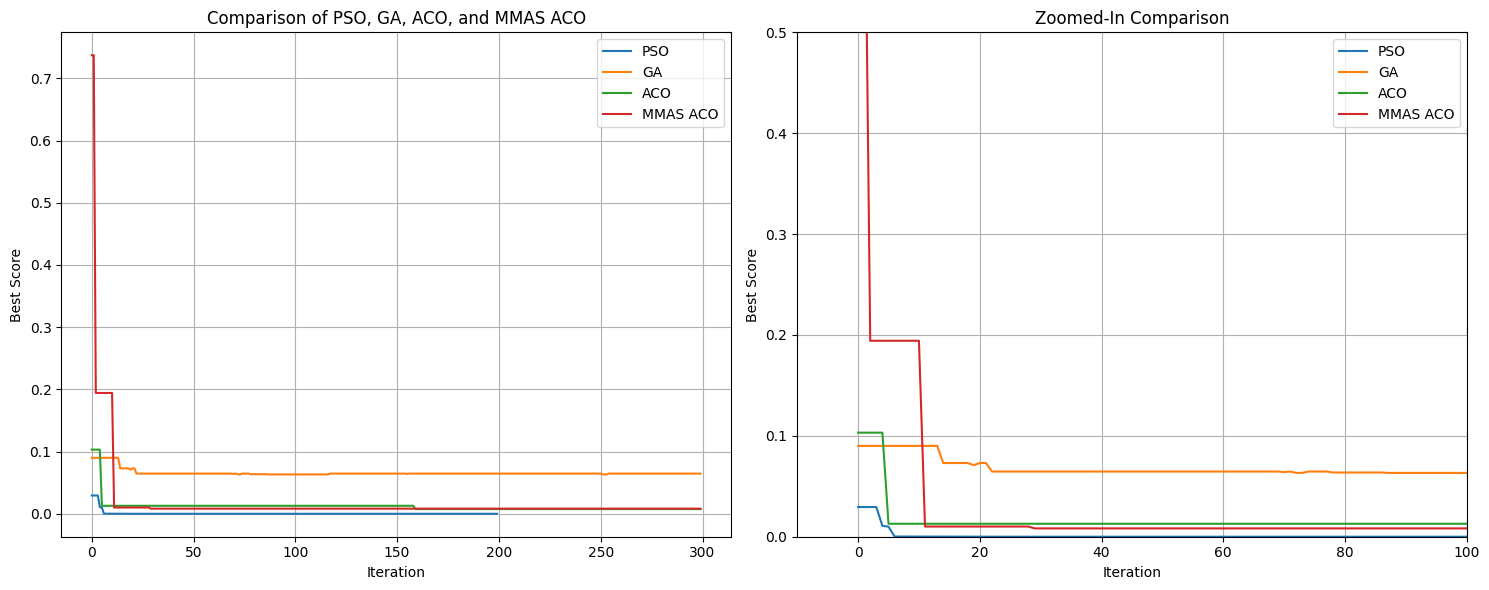

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(progress, label="PSO")
axes[0].plot(ga_progress, label="GA")
axes[0].plot(aco_progress, label="ACO")
axes[0].plot(mmas_progress, label="MMAS ACO")
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Best Score')
axes[0].set_title('Comparison of PSO, GA, ACO, and MMAS ACO')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(progress, label="PSO")
axes[1].plot(ga_progress, label="GA")
axes[1].plot(aco_progress, label="ACO")
axes[1].plot(mmas_progress, label="MMAS ACO")
axes[1].set_xlim([-10, 100])
axes[1].set_ylim([0, 0.5])
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Best Score')
axes[1].set_title('Zoomed-In Comparison')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
results = {
    "Algorithm": ["PSO", "GA", "ACO", "MMAS ACO"],
    "Best Position": [best_position, ga_position, aco_position, mmas_position],
    "Best Score": [best_score, ga_score, aco_score, mmas_score]
}

df_results = pd.DataFrame(results)
df_results

,Algorithm,Best Position,Best Score
0,PSO,"[1.0, 1.0]",0.000000
1,GA,"[1.251583146621296, 1.562819393168402]",0.064620
2,ACO,"[1.070707070707071, 1.1515151515151518]",0.007602
3,MMAS ACO,"[0.9494949494949498, 0.9090909090909092]",0.008251
